In [1]:
import matplotlib.pyplot as plt
import numpy as np

## An introduction / demonstration of the PyFVTool

In [2]:
# enable access to parent directory in order to access pyfvtool module (without pip installation)
from sys import path
path.append('..')

In [3]:
import pyfvtool as pyfvm
from pyfvtool import *

<a id="mesh_ID"></a>
### create a  mesh and visualize it

In [4]:
L = 1.0  # length of the domain
Nx = 10  # number of cells in the domain

In [5]:
# The 1D domain is stored in a mesh-structure object under pyfvtool.mesh.*
m = createMesh1D(Nx, L) # mesh-structure

# Look at the structure of the mesh that was created
print(m)



dims : [10]
cellsize : x : [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y : [0.]
z : [0.]

cellcenters : x : [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
y : [0.]
z : [0.]

facecenters : x : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y : [0.]
z : [0.]

corners : [1]
edges : [1]



In [6]:
# 1D meshes can be created in two ways because the function is overloaded
help(createMesh1D)


Help on function createMesh1D in module pyfvtool.mesh:

createMesh1D(*args) -> pyfvtool.mesh.Mesh1D



In [7]:
help(pyfvm.mesh.MeshStructure)

# 1D, 2D, 3D, 1D radial (axial symmetry), and 2D cylindrical grids can be constructed: 
# s. the below help functions for more details
# help(createMesh1D)
# help(createMesh2D)
# help(createMesh3D)
# help(createMeshCylindrical1D)
# help(createMeshCylindrical2D)

Help on class MeshStructure in module pyfvtool.mesh:

class MeshStructure(builtins.object)
 |  MeshStructure(dims, cellsize, cellcenters, facecenters, corners, edges) -> None
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dims, cellsize, cellcenters, facecenters, corners, edges) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  shift_origin(self, x=0.0, y=0.0, z=0.0)
 |  
 |  visualize(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



Text(0.5, 1.0, 'Visualization of a 1D discretized domain')

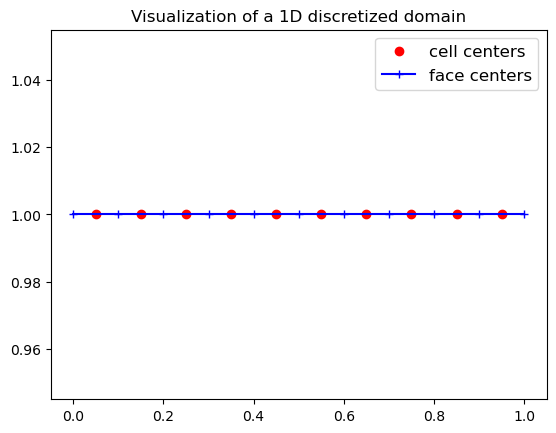

In [8]:

# Visualize the 1D discretization that we created above
hfig, ax = plt.subplots(1,1, num='Grid discretization')
ax.plot(m.cellcenters.x, np.ones(np.shape(m.cellcenters.x), dtype=float), 'or', label='cell centers')
ax.plot(m.facecenters.x, np.ones(np.shape(m.facecenters.x), dtype=float), '-+b', label='face centers')
plt.legend(fontsize=12, loc='best')
ax.set_title('Visualization of a 1D discretized domain')

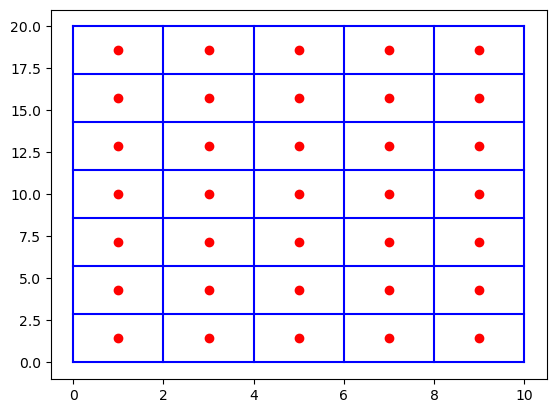

In [9]:
# create a 2D grid and visualize it
Nx, Ny = int(5), int(7)
Lx, Ly = float(10), float(20)
m = createMesh2D(Nx, Ny, Lx, Ly)

# note:  
# MATLAB's meshgrid function is equivalent to numpy.meshgrid(..., indexing='xy') --> plotting
# MATLAB's ndgrid function is equivalent to numpy.meshgrid(..., indexing='ij') --> matrix math
X, Y = np.meshgrid(m.cellcenters.x, m.cellcenters.y, indexing='ij')
Xf, Yf = np.meshgrid(m.facecenters.x, m.facecenters.y, indexing='ij')

plt.figure()
plt.plot(X, Y, 'or', label='nodes')
plt.plot(Xf, Yf, 'b-', label='faces (west/east)')
plt.plot(Xf.T, Yf.T, 'b-', label='faces (north/south)')



In [10]:
# create a 2D grid and visualize it
Nx, Ny, Nz = int(2), int(3), int(4)
Lx, Ly, Lz = float(1.0), float(2.0), float(3.0)
m = createMesh3D(Nx, Ny, Nz, Lx, Ly, Lz)

X, Y, Z = np.meshgrid(m.cellcenters.x, m.cellcenters.y, m.cellcenters.z,  indexing='ij')
Xf, Yf, Zf = np.meshgrid(m.facecenters.x, m.facecenters.y, m.facecenters.z,  indexing='ij')


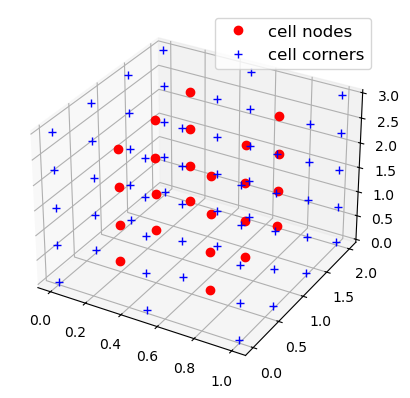

In [11]:
# Plot the 3D grid in an interactive projection
hfig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(X.flatten(), Y.flatten(), Z.flatten(), 'ro', label='cell nodes')
ax.plot3D(Xf.flatten(), Yf.flatten(), Zf.flatten(), 'b+', label='cell corners')
ax.legend(fontsize=12, loc='best')

<a id="boundary_id"></a>
### Boundary condition structure

I had so many reasons to write this toy toolbox, of which, the most important one was to be able to implement different boundary conditions in the most convenient way! My final implementation makes the user able to define either a periodic boundary condition or a general boundary condition of the following form:

$$a (\nabla \phi .\mathbf{n}) + b \phi = c $$

In the above equation, $\phi$ is the unknown, and a, b, and c are constants. In practice, this boundary condition equation will be discretized to the following system of algebraic equations:

$$M_{bc} \phi = {RHS}_{bc}$$

By adjusting the values of a and b, onne can easily define one of the following well-known boundary conditions:

 - Neumann (a is nonzero; b is 0)
 - Dirichlet (a is zero; b is nonzero)
 - Robin (a and b are both nonzero)

In [12]:
# %reset -f

# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib notebook


# import pyfvtool as pyfvm
# from pyfvtool import *

In [13]:
Nx = 10  # number of cells in the domain
Lx = 1.0  # length of the domain
m = createMesh1D(Nx, Lx)  # createMesh and createMesh are identical
BC = createBC(m)  # creates a boundary condition structure
print(BC) # display the BC structure

domain : dims : [10]
cellsize : x : [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
y : [0.]
z : [0.]

cellcenters : x : [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
y : [0.]
z : [0.]

facecenters : x : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y : [0.]
z : [0.]

corners : [1]
edges : [1]

left : a : [1.]
b : [0.]
c : [0.]
periodic : False

right : a : [1.]
b : [0.]
c : [0.]
periodic : False

bottom : a : []
b : []
c : []
periodic : False

top : a : []
b : []
c : []
periodic : False

back : a : []
b : []
c : []
periodic : False

front : a : []
b : []
c : []
periodic : False




In [14]:
# Display only information from the left boundary
print(BC.left)   # a non-zero, b and c == 0, --> homogeneous Neumann BC at left boundary

# display information from right boundary
# print(BC.right)  # same as left boundary --> homogeneous Neumann BC at right-boundary

# Boundary conditions can be editted on the fly 
BC.left.a = 0
BC.left.b = 1  # homogeneous Dirichlet boundary condition
BC.left.c = 0  

# Periodic boundary conditions override the other settings (take precedence)
BC.left.periodic = True

print(BC.left)

a : [1.]
b : [0.]
c : [0.]
periodic : False

a : 0
b : 1
c : 0
periodic : True



For boundary condition structures created for 2D and 3D grids, we will have left, right, bottom, top, back, and front boundaries and thus substructures. Let me show them to you in action:

In [15]:
m = createMesh2D(3, 4, 1.0, 2.0)  # Nx, Ny, Lx, Ly
BC = createBC(m)    

print(BC)
print(BC.top)


domain : dims : [3 4]
cellsize : x : [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
y : [0.5 0.5 0.5 0.5 0.5 0.5]
z : [0.]

cellcenters : x : [0.16666667 0.5        0.83333333]
y : [0.25 0.75 1.25 1.75]
z : [0.]

facecenters : x : [0.         0.33333333 0.66666667 1.        ]
y : [0.  0.5 1.  1.5 2. ]
z : [0.]

corners : [ 0 24  5 29]
edges : [1]

left : a : [1. 1. 1. 1.]
b : [0. 0. 0. 0.]
c : [[0. 0. 0. 0.]]
periodic : False

right : a : [1. 1. 1. 1.]
b : [0. 0. 0. 0.]
c : [0. 0. 0. 0.]
periodic : False

bottom : a : [1. 1. 1.]
b : [0. 0. 0.]
c : [0. 0. 0.]
periodic : False

top : a : [1. 1. 1.]
b : [0. 0. 0.]
c : [0. 0. 0.]
periodic : False

back : a : []
b : []
c : []
periodic : False

front : a : []
b : []
c : []
periodic : False


a : [1. 1. 1.]
b : [0. 0. 0.]
c : [0. 0. 0.]
periodic : False



Yes, that's right. a, b, and c are vectors. It means that you can have different boundary conditions for different cell faces at each boundary. For instance, I can have a Neumann boundary condition for the first cell and a Dirichlet boundary condition for the last cell at the top boundary:


In [16]:
# homogeneous Neumann
BC.top.a[0] = 1
BC.top.b[0] = 0
BC.top.c[0] = 0

# homogeneous Dirichlet
BC.top.a[-1] = 0
BC.top.b[-1] = 1
BC.top.c[-1] = 0

# Some fancy display!
print('  a  b  c (top)')
print('---------------')
print(np.hstack((np.atleast_2d(BC.top.a).T, np.atleast_2d(BC.top.b).T, np.atleast_2d(BC.top.c).T)))

# top.  a     b     c
#    ---------------
#      1     0     0
#      1     0     0
#      0     1     0



  a  b  c (top)
---------------
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


The same procedure can be followed for a 3D grid. However, a, b, and c values are 2D matrices for a 3D grid. I will discuss it in more details when we reach the practical examples. Important note: If you need to assign a boundary condition to the entire boundary, use (:) in your assignment. For instance, to define a Dirichlet boundary for the right boundary, you may write




In [17]:
BC.right.a[:] = 0
BC.right.b[:] = 1
BC.right.c[:] = 0

print('  a  b  c (right)')
print('---------------')
print(np.hstack((np.atleast_2d(BC.right.a).T, np.atleast_2d(BC.right.b).T, np.atleast_2d(BC.right.c).T)))


  a  b  c (right)
---------------
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


<a id="diffusion_ID"></a>
### Solve a diffusion equation

As the first example, we solve a steady-state diffusion equation of the following form

$$\nabla\cdot\left(-D\nabla c\right)=0$$

where $D$ is the diffusivity and $c$ is the concentration. Let me assume that we have a 1D domain, with Dirichlet boundary conditions at both boundaries, i.e., at $x$=0, $c$=1; and at $x$=$L$, $c$=0. First of all, we need to define our domain, discretize it, and define the boundaries at the borders.

Note:  This is a boundary value problem  nad we are solving for th efinal, steady-state solution

In [18]:
# %reset -f

# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib notebook


# import pyfvtool as pyfvm
# from pyfvtool import *

In [19]:
L = 0.01  # a 1 cm domain
Nx = 10   # number of cells
m = createMesh1D(Nx, L)  # create the mesh (note: due to overloading, we cannot use keyword arguments. The parser is not smart enough for that, shame)
BC = createBC(m)  # construct the BC structure (Neumann by default)

# Now switch from Neumann boundary conditions to Dirichlet conditions:
BC.left.a[:], BC.left.b[:], BC.left.c[:] = 0, 1, 0      # left boundary 
BC.right.a[:], BC.right.b[:], BC.right.c[:] = 0, 1, 1   # right boundary

print(BC.left)
print(BC.right)

a : [0.]
b : [1.]
c : [0.]
periodic : False

a : [0.]
b : [1.]
c : [1.]
periodic : False



The next sep is to define the diffusivity coefficient. In this FVTool, the physical properties of the domain are defined for each cell, with the function createCellVariable

In [20]:
# D is a variable on the mesh
# call signature looks like: createCellVariable(meshStructure, value)
D = createCellVariable(m, 1e-5)  # assign a constant value of 1e-5 to diffusivity value on each cell


However, the transfer coefficients must be known on the face of each cell. For this reason, we have a few averaging schemes implemented in the Utilities folder. For a 1D domain, we can use a harmonic mean scheme:

In [21]:
# Note:
#  - this "averaging" is actually an interpolation. It takes the nearest neighbor harmonic mean
#  - the harmonic mean skews towards outliers with small values
D_face = harmonicMean(D)  # average diffusivity value on the cell faces.

Now, we can convert the PDE to a algebraic system of linear equations, i.e.,

$$\nabla\cdot\left(-D\nabla c\right) \approx Mc = 0$$

where M is the matrix of coefficient that is going to be calculated using this toolbox. The matrix of coefficient, M has two parts. The diffusion equation and the boundary conditions. They are calculated by:

In [22]:
M_diff = diffusionTerm(D_face)  #  matrix of coefficients for diffusion term
M_bc, RHS_bc = boundaryConditionTerm(BC) # matrix of coefficient and RHS vector for the boundary condition


A vector of right hand side values are always obtained during the discretization of the boundary conditions. Now that the PDE is discretized, we can solve it by a scipy linear solver.

In [23]:
# Signature:
# result = solvePDE(meshStructure, csr_array, csr_array)
c = solvePDE(m, M_diff+M_bc, RHS_bc)


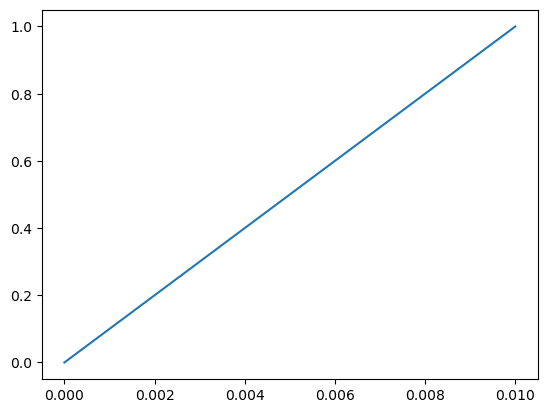

In [24]:
# visualize the solution
plt.figure()
visualizeCells(c)

Just to get excited a little bit, only change the mesh definition command from createMesh1D(Nx,L) to createMesh2D(Nx,Nx,L,L), run the code and see what happens. For even more excitement, change it to createMesh3D(Nx,Nx,Nx,L,L,L). This is usually the way we develop new mathematical models for a physical phenomenon. Write the equation, solve it in 1D, compare it to the analytical solution, then solve it numerically in 2D and 3D for more realistic cases with heterogeneous transfer coefficients and other nonidealities (and perhaps compare it to some experimental data)

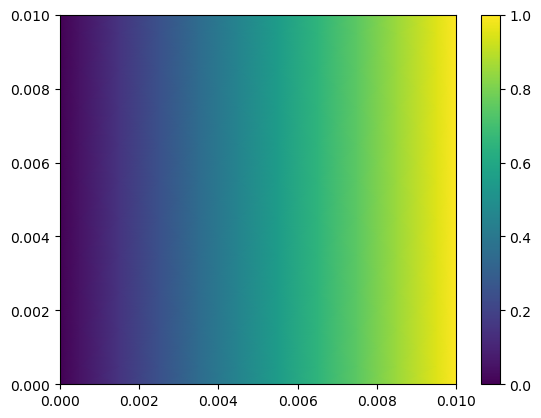

In [25]:
# 2D
# %reset -f

# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib notebook


# import pyfvtool as pyfvm
# from pyfvtool import *

# ============= #

L = 0.01  # a 1 cm domain
Nx = 10   # number of cells
m = createMesh2D(Nx, Nx, L, L)  # create the mesh (note: due to overloading, we cannot use keyword arguments. The parser is not smart enough for that, shame)
BC = createBC(m)  # construct the BC structure (Neumann by default)

# Now switch from Neumann boundary conditions to Dirichlet conditions:
BC.left.a[:], BC.left.b[:], BC.left.c[:] = 0, 1, 0      # left boundary: homogeneous Dirichlet left-side 
BC.right.a[:], BC.right.b[:], BC.right.c[:] = 0, 1, 1   # right boundary: inhomogeneous Dirchlet right-side

# Create a face-variable for the diffusion coefficient
D = createCellVariable(m, 1e-5)  # define the diffusivity
D_face = harmonicMean(D)  # interpolate to face positions

# Create the coefficient matrix and source vectors
M_diff = diffusionTerm(D_face)  #  matrix of coefficients for diffusion term
M_bc, RHS_bc = boundaryConditionTerm(BC)

# Solve the problem in 2D
c = solvePDE(m, M_diff+M_bc, RHS_bc)

# Visualize the solution
plt.figure()
visualizeCells(c)
plt.colorbar()

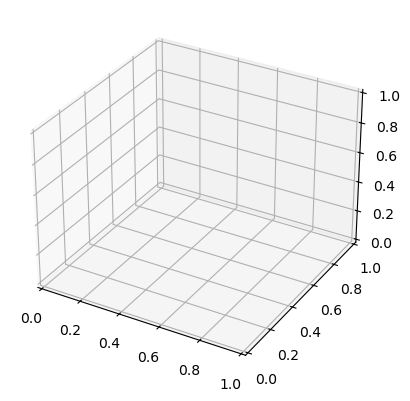

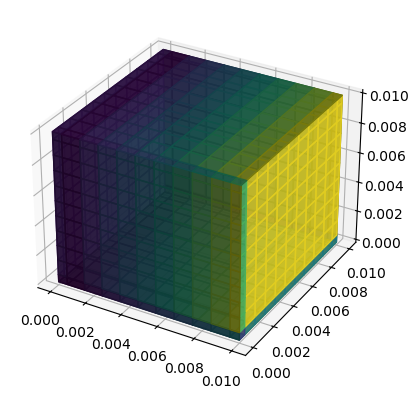

In [26]:
# 3D
# %reset -f

# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib notebook


# import pyfvtool as pyfvm
# from pyfvtool import *

# ============= #

L = 0.01  # a 1 cm domain
Nx = 10   # number of cells
m = createMesh3D(Nx, Nx, Nx, L, L, L)  # create the mesh (note: due to overloading, we cannot use keyword arguments. The parser is not smart enough for that, shame)
BC = createBC(m)  # construct the BC structure (Neumann by default)

# Now switch from Neumann boundary conditions to Dirichlet conditions:
BC.left.a[:], BC.left.b[:], BC.left.c[:] = 0, 1, 0      # left boundary: homogeneous Neumann left-boundary 
BC.right.a[:], BC.right.b[:], BC.right.c[:] = 0, 1, 1   # right boundary: inhomogeneous Neumann right-boundary

# Create a face-variable for the diffusion coefficient
D = createCellVariable(m, 1e-5)  # define the diffusivity
D_face = harmonicMean(D)  # interpolate to face positions

# Create the coefficient matrix and source vectors
M_diff = diffusionTerm(D_face)  #  matrix of coefficients for diffusion term
M_bc, RHS_bc = boundaryConditionTerm(BC)

# Solve the problem in 2D
c = solvePDE(m, M_diff+M_bc, RHS_bc)

# Visualize the solution
hfig = plt.figure()
ax = hfig.add_subplot(projection='3d')
visualizeCells(c)
# plt.colorbar()

<a id="convection_diffusion_ID"></a>
### Solve a convection-diffusion equation and compare it to an analytic solution

Here, I'm going to add a convection term to what we solved in the previous example. This tutorial is adopted from the fipy convection-diffusion example you can find at this address:

http://www.ctcms.nist.gov/fipy/examples/convection/index.html

The differential equation reads

$$\nabla\cdot\left(\mathbf{u} \phi -D\nabla \phi \right)=0$$

Here, $\mathbf{u}$ is a velocity vector (face variable) and $D$ is the diffusion coefficient (again a face variable). Please see the PDF document for an explanation of cell and face variables. We use Dirichlet (constant value) boundary conditions on the left and right boundaries. It is zero at the left boundary and one at the right boundary. The analytical solution of this differential equation reads

$$c = \frac{1-\exp(ux/D)}{1-\exp(uL/D)}$$



In [27]:
# %reset -f

# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib notebook


# import pyfvtool as pyfvm
# from pyfvtool import *

In [28]:
# Define the domain and mesh
L = 1    # domain length
Nx = 25  # number of cells
meshstruct = createMesh1D(Nx, L)
x = meshstruct.cellcenters.x   #  extract the cell center positions

In [29]:
# Define the boundary condition
BC = createBC(meshstruct)   # all Neumann boundary condition structure
BC.left.a[:], BC.left.b[:], BC.left.c[:] = 0., 1., 0.    # switch the left boundary to homogeneous Dirichlet
BC.right.a[:], BC.right.b[:], BC.right.c[:] = 0., 1., 1. # switch the right boundary to inhomogeneous Dirichlet

In [30]:
# Now we define the transfer coefficients:
D_val = 1.0  # diffusion coefficient value
D = createCellVariable(meshstruct, D_val)  # assign dif. coef. to all the cells
Dave = harmonicMean(D)    # convert a cell variable to face variable

u = -10 # velocity value
u_face = createFaceVariable(meshstruct, u)  # assign velocity value to cell faces


Now we discretize the differential equation into a system of linear algebraic equations:

$$(M_{conv}-M_{diff}+M_{bc})\phi={RHS}_{bc}$$

or if we use an upwind discretization scheme, we will obtain:

$$(M_{conv,uw}-M_{diff}+M_{bc})\phi={RHS}_{bc}$$

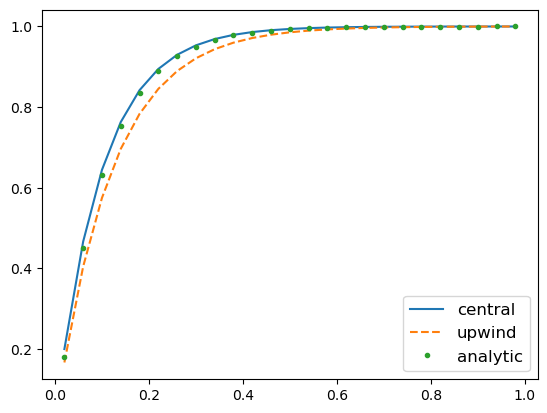

In [31]:
# convection term, central, second order
Mconv =  convectionTerm(u_face) 

#  convection term, upwind, first order
Mconvupwind = convectionUpwindTerm(u_face) 

# Diffusion term
Mdiff = diffusionTerm(Dave)

# boundary condition discretization
Mbc, RHSbc = boundaryConditionTerm(BC)

# Coefficient matrix for central finite-differencing scheme
M = Mconv - Mdiff + Mbc 

# Coefficient matrix for upwind discretization scheme
Mupwind = Mconvupwind-Mdiff+Mbc

# Righ-hand-side vector
RHS = RHSbc

# solve for the central scheme
c = solvePDE(meshstruct, M, RHS)

# solve for the upwind scheme
c_upwind = solvePDE(meshstruct, Mupwind, RHS)

# analytic solution
c_analytical = (1-np.exp(u*x/D_val))/(1-np.exp(u*L/D_val))

# visualization
plt.figure()
plt.plot(x, c.value[1:Nx+1], '-', label='central')
plt.plot(x, c_upwind.value[1:Nx+1], '--', label='upwind')
plt.plot(x, c_analytical, '.', label='analytic')
plt.legend(fontsize=12, loc='best')

As you see here, we obtain a more accurate result by using a central difference discretization scheme for the convection term compared to the first order upwind.

<a id="transient_diffusion_ID"></a>
### Solve a transient diffusion equation

This tutorial is adapted from the fipy 1D diffusion example

FiPy diffusion tutorial The transient diffusion equation reads

$$\alpha\frac{\partial c}{\partial t}+\nabla.\left(-D\nabla c\right)=0,$$

where $c$ is the independent variable (concentration, temperature, etc) , $D$ is the diffusion coefficient, and $\alpha$ is a constant.


In [32]:
# Define the domain and create a mesh structure
L = 50   # domain length
Nx = 20  # number of cells
m = createMesh1D(Nx, L)
x = m.cellcenters.x  # cell centers position

In [33]:
# Create the boundary condition structure:
BC = createBC(m)  # all Neumann boundary condition structure

# Switch the left and right boundaries to Dirichlet:
BC.left.a[:], BC.left.b[:], BC.left.c[:] = 0.0, 1.0, 1.0    # left boundary
BC.right.a[:], BC.right.b[:], BC.right.c[:] = 0.0, 1.0, 0.0 # right boundary

In [34]:
# Define the transfer coefficients:
D_val = 1
D = createCellVariable(m, D_val)
Dave = harmonicMean(D)  # convert it to face variables

# Define alfa, the coefficient of the transient term:
alfa_val = 1
alfa = createCellVariable(m, alfa_val)

In [35]:
# Define the initial values:
c_init = 0
c_old = createCellVariable(m, c_init, BC)  # initial values
c = c_old  # assign the old value of the cells to the current values

In [36]:
# Now define the time step and the final time:
dt = 0.1  # time step
final_t = 100


Here, we first define the coefficient matrices that will not change as we progress in time, viz. diffusion term and boundary condition:


In [37]:
Mdiff = diffusionTerm(Dave)
Mbc, RHSbc = boundaryConditionTerm(BC)

The transitionTerm function gives a matrix of coefficient and a RHS vector. The matrix of coefficient does not change in each time step, but the RHS does (see the PDF documents). Therefore, we need to call the function inside the time loop. Start the loop here:

In [38]:
# import the error function from scipy
from scipy.special import erf

In [39]:
tt = np.arange(start=dt, stop=final_t, step=dt) # t=dt:dt:final_t

ci = []
ca = []
for ii, t in enumerate(tt):        
    M_trans, RHS_trans = transientTerm(c_old, dt, alfa)
    
    M = M_trans-Mdiff+Mbc
    RHS = RHS_trans+RHSbc
    
    ci.append( solvePDE(m, M, RHS) )
    
    ca.append( 1.0-erf(x/(2*np.sqrt(D_val*t))))
    c_old = ci[ii]

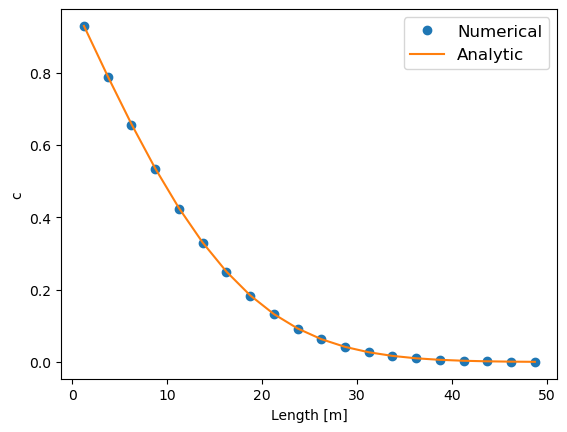

In [40]:
# Now visualize the final results
plt.figure()
plt.plot(x, ci[-1].value[1:Nx+1], 'o', label='Numerical')
plt.plot(x, ca[-1], '-', label='Analytic')
plt.xlabel('Length [m]')
plt.ylabel('c')
plt.legend(fontsize=12, loc='best')


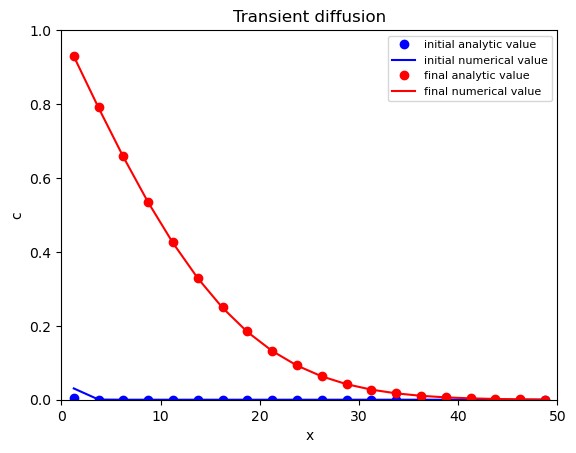

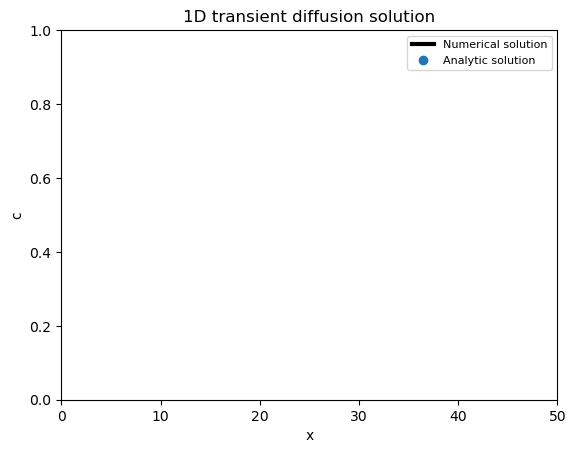

In [41]:
# Plotting and visualization of the 1D transient diffusion solution  
from matplotlib.animation import FuncAnimation

hfig1, ax1 = plt.subplots()

# xx, uu = pyfvm.utilities.get_CellVariable_profile1D(ci[0])
# ax1.plot(xx, uu, 'b-', label='initial value')
ax1.plot(x, ca[0], 'bo', label='initial analytic value')
ax1.plot(x, ci[0].value[1:Nx+1], 'b-', label='initial numerical value')


# xx, uu = pyfvm.utilities.get_CellVariable_profile1D(ci[-1])
# ax1.plot(xx, uu, 'r-', label='final value')
ax1.plot(x, ca[-1], 'ro', label='final analytic value')
ax1.plot(x, ci[-1].value[1:Nx+1], 'r-', label='final numerical value')

ax1.set_xlim((0, L))
ax1.set_ylim((0.0, 1.0))

ax1.set_xlabel('x')
ax1.set_ylabel('c')
ax1.set_title('Transient diffusion')
ax1.legend(fontsize=8)

# ========= #

# create a figure to handle the solution animation
#   pre-generate the handles to the axes and the line
hfig2 = plt.figure()
ax2 = plt.axes(xlim=(0, L), ylim=(0.0, 1.0))
line, = ax2.plot([], [], 'k-', lw=3, label='Numerical solution')
circ, = ax2.plot([], [], 'o', lw=3, label='Analytic solution')

ax2.set_xlabel('x')
ax2.set_ylabel('c')
ax2.set_title('1D transient diffusion solution')
ax2.legend(fontsize=8)


def init():
    line.set_data([], [])
    circ.set_data([], [])
    return line, circ

def animate(ii):
    global x
    global ci
    global ca
    global Nx
    # line.set_data(*pyfvm.utilities.get_CellVariable_profile1D(ci[ii]))
    line.set_data(x, ci[ii].value[1:Nx+1])    
    circ.set_data(x, ca[ii])        
    return line, circ

anim = FuncAnimation(hfig2, animate, init_func=init,
            frames=400, interval=20, blit=True)

<a id="convection_disc_ID"></a>
### Convection equations; different discretization schemes

If I want to highlight one special feature of this FVTool, I will point a finger on its various discretization schemes for a linear convection term, which includes central difference (second order), upwind (first order), and TVD scheme with various flux limiters.

Here, we are going to compare the performance of each scheme for solving two PDE's. First, a simple linear transient convection equation with an strange initial condition and later, we solve the well-known Burger's equation.


1) Simple linear transient convection (with a strange initial condition)

    $$ \frac{\partial \varphi}{\partial t} + \nabla\cdot\left(\vec{u}\varphi\right) + \nabla\cdot\left(-D\nabla\varphi\right) = \vec{0} $$    

with periodic boundary conditions on a 1D-domain with constant coefficients $u$=0.3 m/s and $D$=0.01 m$^2$/s.

Initial condition:
$$\varphi\left(x, 0\right) \,=\, \begin{equation}
\left\{ 
  \begin{aligned}
    &0,\,\, &0.0 \le \,&x<0.04 \\
    &1\,\,  &0.04\le \,&x<0.24 \\
    &0\,\,  &0.24\le \,&x<0.36 \\    
    &\sin\left(10\,\pi\,x\right)\,\,  &0.36\le \,&x<0.8 \\        
    &0,\,\, &0.8 \le \,&x\le1.0 \\
  \end{aligned}
  \right.
\end{equation}
$$

In [42]:
# define a 1D domain and mesh
W = 1
Nx = 500
mesh1 = createMesh1D(Nx, W)
x = mesh1.cellcenters.x

In [43]:
# define periodic boundary conditions
BC = createBC(mesh1)  # all Neumann BC's
BC.left.periodic = True 
BC.right.periodic = True

In [44]:
# Coefficient matrix and effective source for the periodic boundary condtiions
Mbc, RHSbc = boundaryConditionTerm(BC)   # define the BC term

In [45]:
# Initial values
phi_old = createCellVariable(mesh1, 0.0, BC)
phi_old.value[19:120] = 1   # (20:120)
phi_old.value[179:400] = np.sin(x[179:400]*10*np.pi)  # (180:400)

# initial guess for phi
phi = phi_old
phiuw_old = phi_old

# initial values for upwind scheme
phiuw = phi

# keep the initial values for visualization
phiinit = phi_old

In [46]:
# Define the coefficient terms

# velocity field
u = 0.3   # m/s
uf = createFaceVariable(mesh1, u)

# diffusion field
D = 1e-2  # m2/s
Df = createFaceVariable(mesh1, D)

# transient term coefficient
alfa = createCellVariable(mesh1,1.0)

In [47]:
# Constant coefficient matrices:
Mconvuw = convectionUpwindTerm(uf)   # upwind convection term

In [48]:
# Choose a flux limiter
FL = fluxLimiter('Superbee')

The flux limiter of your choice is not available. The SUPERBEE flux limiter is used instead.


In [49]:
# Solver
dt = 0.001  # [s], time step
final_t = W/u

tt = 0
count = 0

phi_tvd = []
phi_uw = []
while (tt<final_t) and count < 5e3:
    tt += dt
    
    # inner loop for TVD scheme
    for jj in range(5): 

        Mt, RHSt = transientTerm(phi_old, dt, alfa)

        # MW edit
        # Mconv, RHSconv = convectionTvdRHSTerm(uf, phi, FL)
        RHSconv = convectionTvdRHSTerm(uf, phi, FL)
        
        # Form the system
        
        # MW edit
        # M = Mconv + Mt + Mbc
        M = Mt + Mbc
        RHS = RHSt + RHSbc + RHSconv
        
        # Solve the PDE
        phi = solvePDE(mesh1, M, RHS)
        
    # Store the TVD solution for later animation
    phi_tvd.append(phi)

    # Calculate the tarnsient term for the upwind scheme
    Mtuw, RHStuw = transientTerm(phiuw_old, dt, alfa);
    
    # Form the system of equations
    Muw = Mconvuw + Mtuw + Mbc
    RHSuw = RHStuw + RHSbc

    # Solve the system of equations using the Upwind discretization    
    phiuw = solvePDE(mesh1, Muw, RHSuw)
    
    # store the solution 
    phiuw_old = phiuw
    phi_old = phi
    phi_uw.append(phiuw)
    
    count += 1

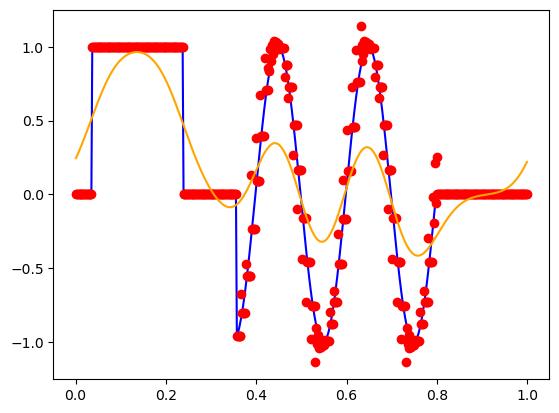

In [50]:
# Visualize the problem solution
hfig, ax = plt.subplots(1, 1)
ax.plot(x, phiinit.value[1:Nx+1], 'b-', label='initial value')
ax.plot(x, phi.value[1:Nx+1], 'ro', label='TVD solution')
ax.plot(x, phiuw.value[1:Nx+1], '-', color='orange', label='upwind solution')

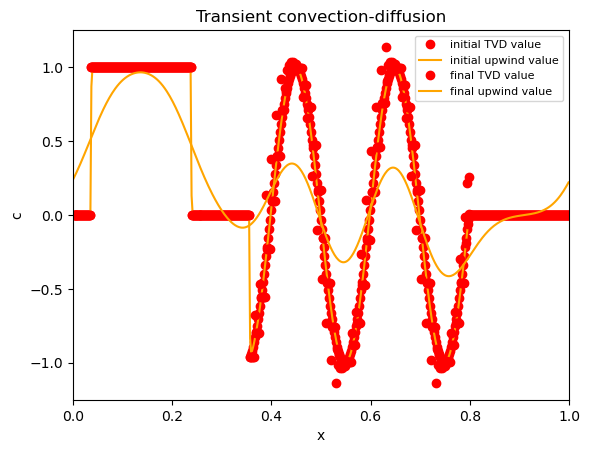

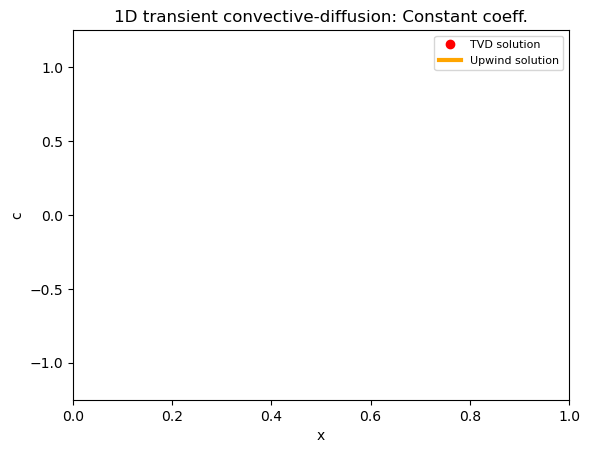

In [51]:
# Plotting and visualization of the 1D transient diffusion solution  
from matplotlib.animation import FuncAnimation

# phi_tvd, phi_uw

hfig1, ax1 = plt.subplots()
ax1.plot(x, phi_tvd[0].value[1:Nx+1], 'ro', label='initial TVD value')
ax1.plot(x, phi_uw[0].value[1:Nx+1], '-', color='orange', label='initial upwind value')

ax1.plot(x, phi_tvd[-1].value[1:Nx+1], 'ro', label='final TVD value')
ax1.plot(x, phi_uw[-1].value[1:Nx+1], '-', color='orange', label='final upwind value')

ax1.set_xlim((0, W))
ax1.set_ylim((-1.25, 1.25))

ax1.set_xlabel('x')
ax1.set_ylabel('c')
ax1.set_title('Transient convection-diffusion')
ax1.legend(fontsize=8)

# ========= #

# create a figure to handle the solution animation
#   pre-generate the handles to the axes and the line
hfig2 = plt.figure()
ax2 = plt.axes(xlim=(0, W), ylim=(-1.25, 1.25))
line, = ax2.plot([], [], 'ro', lw=3, label='TVD solution')
circ, = ax2.plot([], [], '-', color='orange', lw=3, label='Upwind solution')

ax2.set_xlabel('x')
ax2.set_ylabel('c')
ax2.set_title('1D transient convective-diffusion: Constant coeff.')
ax2.legend(fontsize=8)


def init():
    line.set_data([], [])
    circ.set_data([], [])
    return line, circ

def animate(ii):
    global x
    global ci
    global ca
    global Nx

    circ.set_data(x, phi_tvd[ii])        
    line.set_data(x, phi_uw[ii].value[1:Nx+1])    
    return line, circ

anim = FuncAnimation(hfig2, animate, init_func=init,
            frames=400, interval=20, blit=True)

In [52]:
## method of lines: using Matlab's ODE solvers for adaptive time stepping
#
#
# ## solving a nonlinear PDE
#
# ## solving a system of linear PDE's: sequential and coupled methods
#
# ## solving a system of nonlinear PDE's: sequential and coupled olutions
#
# ## Real life cases: water-flooding in the production of oil
#
# ## and finally your examples?
#
#
#

The generalized form of the equations solved in this package looks like, 
    $$ \alpha \frac{\partial \varphi}{\partial t} + \nabla\cdot\left(\vec{u}\varphi\right) + \nabla\cdot\left(-D\nabla\varphi\right) + \beta \varphi = \gamma $$

with boundary condition,
    $$ a\nabla\varphi\cdot \vec{e} + b\varphi = c $$.


## 1D Diffusion with a fixed concentration 
(Dirichlet left boundary, Neumann right boundary)

In [53]:
# %reset -f

# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib notebook


# import pyfvtool as pyfvm
# from pyfvtool import *

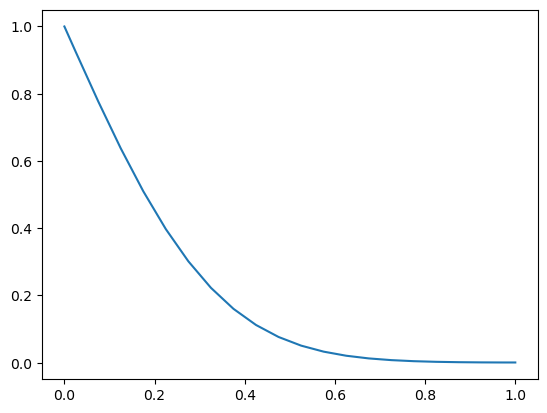

In [54]:
# Solving a 1D diffusion equation with a fixed concentration 
# at the left boundary and a closed boundary on the right side
Nx = 20 # number of finite volume cells
Lx = 1.0 # [m] length of the domain 
c_left = 1.0 # left boundary concentration
c_init = 0.0 # initial concentration
D_val = 1e-5 # diffusion coefficient (gas phase)
t_simulation = 3600.0 # [s] simulation time
dt = 60.0 # [s] time step

m1 = createMesh1D(Nx, Lx) # mesh object
bc = createBC(m1) # Neumann boundary condition by default

# switch the left boundary to Dirichlet: fixed concentration
bc.left.a[:] = 0.0
bc.left.b[:] = 1.0
bc.left.c[:] = c_left

# create a cell variable with initial concentration
c_old = createCellVariable(m1, c_init, bc)

# assign diffusivity to cells
D_cell = createCellVariable(m1, D_val)
D_face = geometricMean(D_cell) # average value of diffusivity at the interfaces between cells

# Discretization
Mdiff = diffusionTerm(D_face)
Mbc, RHSbc = boundaryConditionTerm(bc)

# time loop
t = 0
while t<t_simulation:
    t+=dt
    Mt, RHSt = transientTerm(c_old, dt, 1.0)
    c_new = solvePDE(m1, Mt-Mdiff+Mbc, RHSbc+RHSt)
    c_old.update_value(c_new)

visualizeCells(c_old)

## Diffusion in 1D cylindrical mesh: 
Analytic solution to the heat transfer problem + numerical solution with pyfvtool

In [55]:
# %reset -f

# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib notebook


# import pyfvtool as pyfvm
# from pyfvtool import *

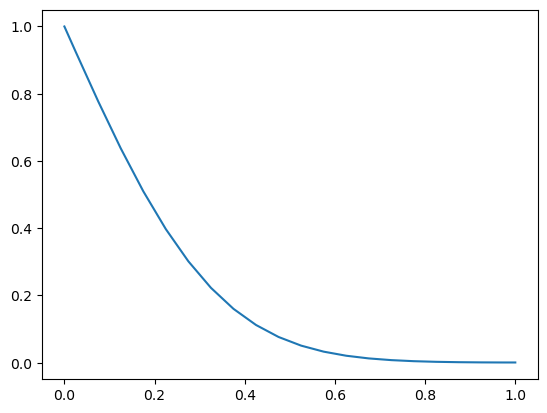

In [56]:
# Solving a 1D diffusion equation with a fixed concentration 
# at the left boundary and a closed boundary on the right side
Nx = 20 # number of finite volume cells
Lx = 1.0 # [m] length of the domain 
c_left = 1.0 # left boundary concentration
c_init = 0.0 # initial concentration
D_val = 1e-5 # diffusion coefficient (gas phase)
t_simulation = 3600.0 # [s] simulation time
dt = 60.0 # [s] time step

m1 = createMesh1D(Nx, Lx) # mesh object
bc = createBC(m1) # Neumann boundary condition by default

# switch the left boundary to Dirichlet: fixed concentration
bc.left.a[:] = 0.0
bc.left.b[:] = 1.0
bc.left.c[:] = c_left

# create a cell variable with initial concentration
c_old = createCellVariable(m1, c_init, bc)

# assign diffusivity to cells
D_cell = createCellVariable(m1, D_val)
D_face = geometricMean(D_cell) # average value of diffusivity at the interfaces between cells

# Discretization
Mdiff = diffusionTerm(D_face)
Mbc, RHSbc = boundaryConditionTerm(bc)

# time loop
t = 0
while t<t_simulation:
    t+=dt
    Mt, RHSt = transientTerm(c_old, dt, 1.0)
    c_new = solvePDE(m1, Mt-Mdiff+Mbc, RHSbc+RHSt)
    c_old.update_value(c_new)

visualizeCells(c_old)